In [32]:
import os
import numpy as np
from numpy import array
import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# from mockfactory import Catalog
from cosmoprimo.fiducial import DESI
from desilike.theories.galaxy_clustering import DirectPowerSpectrumTemplate, ShapeFitPowerSpectrumTemplate, StandardPowerSpectrumTemplate
from desilike.theories.galaxy_clustering import KaiserTracerPowerSpectrumMultipoles, TNSTracerPowerSpectrumMultipoles, FOLPSTracerPowerSpectrumMultipoles
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable
from desilike.emulators import EmulatedCalculator, Emulator, TaylorEmulatorEngine
from desilike.likelihoods import ObservablesGaussianLikelihood
from desilike.samples import Profiles
from desilike.profilers import MinuitProfiler
from desilike import setup_logging
setup_logging()  # for logging messages

In [35]:
# from mockfactory import Catalog
from cosmoprimo.fiducial import DESI
from desilike.theories.galaxy_clustering import DirectPowerSpectrumTemplate, ShapeFitPowerSpectrumTemplate, StandardPowerSpectrumTemplate
from desilike.theories.galaxy_clustering import KaiserTracerPowerSpectrumMultipoles, TNSTracerPowerSpectrumMultipoles, FOLPSTracerPowerSpectrumMultipoles
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable
from desilike.emulators import EmulatedCalculator, Emulator, TaylorEmulatorEngine
from desilike.likelihoods import ObservablesGaussianLikelihood
from desilike.samplers.emcee import EmceeSampler
from desilike.samples import Profiles, plotting, Chain
from desilike import setup_logging
setup_logging()  # for logging messages

kmin     = 0.008
kmax     = 0.2
binning  = 0.006
k_ev     = np.arange(kmin, kmax+0.001, binning)
klim     = {ell*2: (kmin,kmax,binning) for ell in range(2)}

# the cosmology parameters
redshift    = 1.0
catalogue   = 'fiducial'  # fiducial, Mnu_p, Mnu_ppp -- QUIJOTE catalogue
r_pk        = 'RSD'  # RSD, LRG, QSQ, CATAS-- systematics
CovRsf      = 25  # -- covariance rescale factor
model       = 'FOLPS' # Kaiser, TNS, FOLPS
fitting     = 'FM' #FM, SF, STD
emulator_fn = f'./model/emulator_{model}_z{redshift}_{fitting}.npy'


filename = []
filedir = f'/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/{r_pk}_z{redshift}/npy/'
for file in os.listdir(filedir):
    filename.append(filedir+file)
covariance = filedir+'*'
theory = FOLPSTracerPowerSpectrumMultipoles(pt=EmulatedCalculator.load(emulator_fn))
observable = TracerPowerSpectrumMultipolesObservable(data= filename,
                                                    covariance= covariance,
                                                    klim=klim,
                                                    theory=theory,
                                                    # kin=np.arange(0.001,0.35,0.002)
                                                    )
likelihood = ObservablesGaussianLikelihood(observable) #
profiler = MinuitProfiler(likelihood, seed=42)
profiles = profiler.maximize()
print(profiles.to_stats(tablefmt='pretty'))
best_params = profiles.bestfit.choice(input=True)
# likelihood(**profiles.bestfit.choice(input=True))

[000000.01] [0/1] 10-14 19:52  Emulator                  INFO     Loading ./model/emulator_FOLPS_z1.0_FM.npy.
[000000.62] [0/1] 10-14 19:52  TracerPowerSpectrumMultipolesObservable INFO     Loading 100 files [/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_122_z1.0.npy, ..., /Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_101_z1.0.npy, ..., /Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_189_z1.0.npy, ..., /Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_141_z1.0.npy, ..., /Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_180_z1.0.npy].
[000000.75] [0/1] 10-14 19:52  TracerPowerSpectrumMultipolesObservable INFO     Loading 100 files [/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_100_z1.0.npy, ..., /Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_120_z1.0.npy, ..., /Users/alain/Desk

{'h': ParameterArray(h, None, 0.682423905652797), 'omega_cdm': ParameterArray(omega_cdm, None, 0.1021610230632544), 'omega_b': ParameterArray(omega_b, None, 0.02236607006571255), 'logA': ParameterArray(logA, None, 3.944509437701969), 'b1': ParameterArray(b1, None, 2.111000552509215), 'b2': ParameterArray(b2, None, -0.43256573193490555), 'bs': ParameterArray(bs, None, -0.6204784020065485), 'alpha0': ParameterArray(alpha0, None, 1.5299967538297186), 'alpha2': ParameterArray(alpha2, None, -127.10555631584202), 'sn0': ParameterArray(sn0, None, 0.1250965950855365), 'sn2': ParameterArray(sn2, None, 0.35229207087747516), 'n_s': ParameterArray(n_s, None, 0.9649), 'tau_reio': ParameterArray(tau_reio, None, 0.0544), 'm_ncdm': ParameterArray(m_ncdm, None, 0.05999991930682943), 'N_eff': ParameterArray(N_eff, None, 3.045998221453431), 'w0_fld': ParameterArray(w0_fld, None, -1.0), 'wa_fld': ParameterArray(wa_fld, None, 0.0), 'Omega_k': ParameterArray(Omega_k, None, 0.0), 'b3': ParameterArray(b3, Non

Text(0, 0.5, '$\\chi^2$')

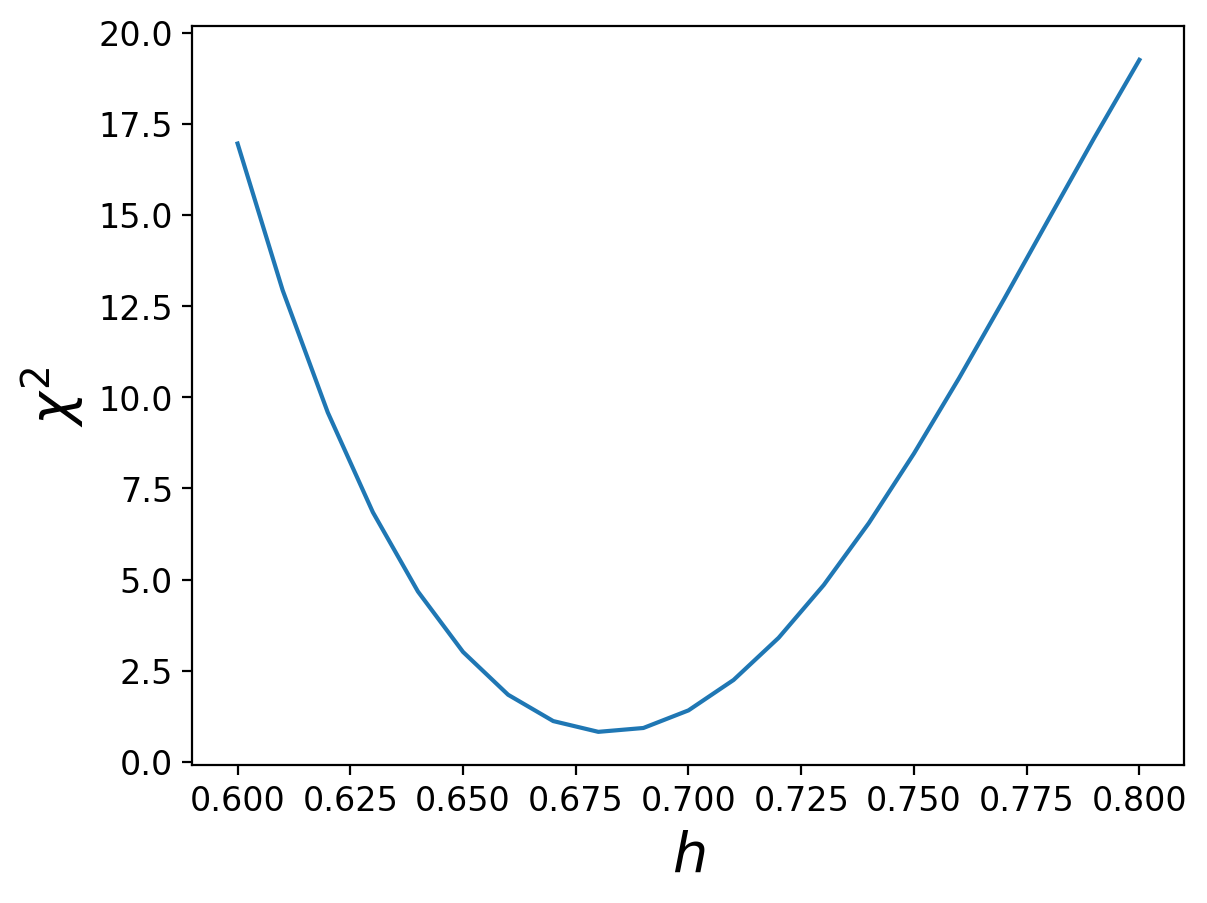

In [64]:
best_params = profiles.bestfit.choice(input=True)
print(best_params)

hchi2= []
hh = np.arange(0.6,0.8,0.01)
for h in hh:
    best_params['h'] = h
    hchi2.append(-likelihood(**best_params)*2)
plt.plot(hh, hchi2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$h$', fontsize=20)
plt.ylabel(r'$\chi^2$', fontsize=20)

{'h': ParameterArray(h, None, 0.682423905652797), 'omega_cdm': ParameterArray(omega_cdm, None, 0.1021610230632544), 'omega_b': ParameterArray(omega_b, None, 0.02236607006571255), 'logA': ParameterArray(logA, None, 3.944509437701969), 'b1': ParameterArray(b1, None, 2.111000552509215), 'b2': ParameterArray(b2, None, -0.43256573193490555), 'bs': ParameterArray(bs, None, -0.6204784020065485), 'alpha0': ParameterArray(alpha0, None, 1.5299967538297186), 'alpha2': ParameterArray(alpha2, None, -127.10555631584202), 'sn0': ParameterArray(sn0, None, 0.1250965950855365), 'sn2': ParameterArray(sn2, None, 0.35229207087747516), 'n_s': ParameterArray(n_s, None, 0.9649), 'tau_reio': ParameterArray(tau_reio, None, 0.0544), 'm_ncdm': ParameterArray(m_ncdm, None, 0.05999991930682943), 'N_eff': ParameterArray(N_eff, None, 3.045998221453431), 'w0_fld': ParameterArray(w0_fld, None, -1.0), 'wa_fld': ParameterArray(wa_fld, None, 0.0), 'Omega_k': ParameterArray(Omega_k, None, 0.0), 'b3': ParameterArray(b3, Non

Text(0, 0.5, '$\\chi^2$')

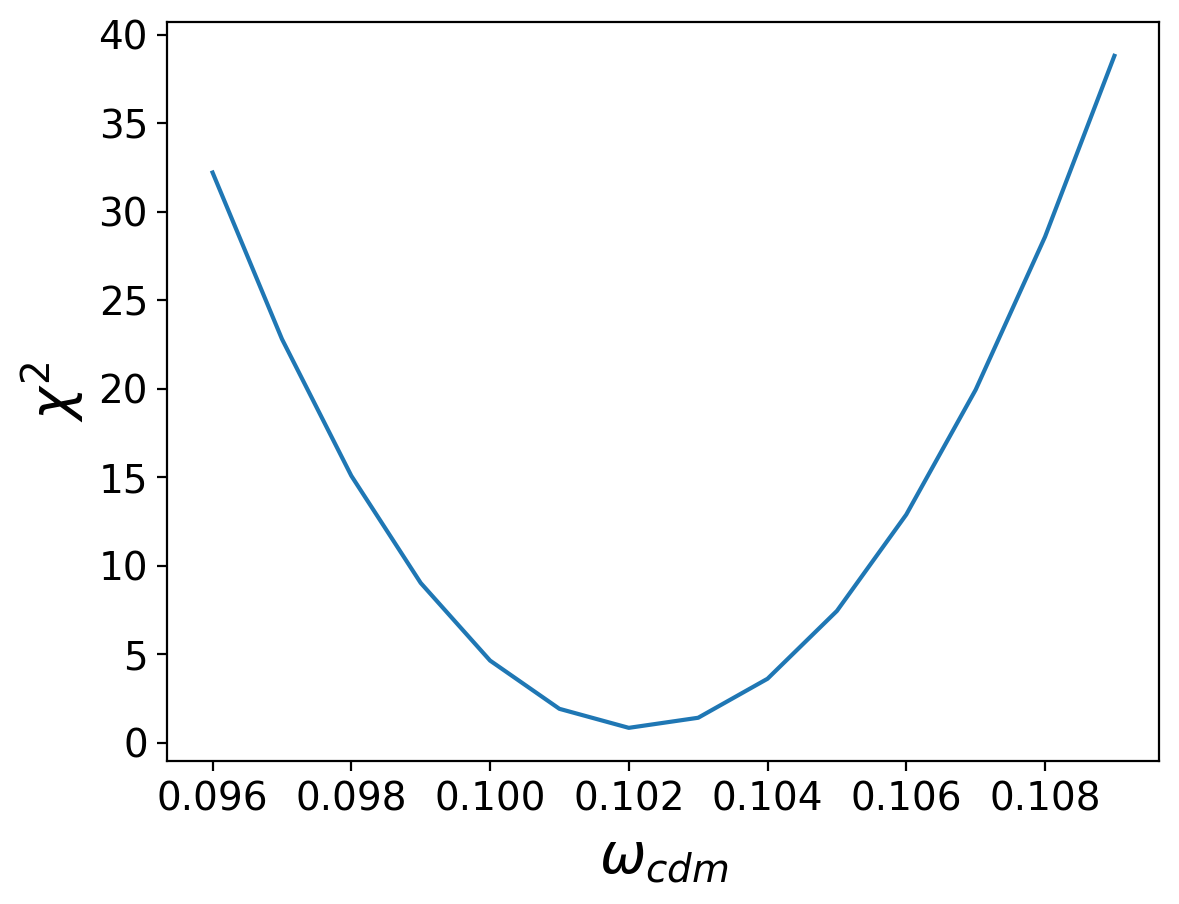

In [61]:
best_params = profiles.bestfit.choice(input=True)
print(best_params)

cdmchi2= []
ccdm = np.arange(0.096,0.110,0.001)
for cdm in ccdm:
    best_params['omega_cdm'] = cdm
    cdmchi2.append(-likelihood(**best_params)*2)
plt.plot(ccdm, cdmchi2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$\omega_{cdm}$', fontsize=20)
plt.ylabel(r'$\chi^2$', fontsize=20)